<a href="https://colab.research.google.com/github/aimazin/Health-Informatics-Healthcare-Management/blob/main/hospitalNOEBMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As of my last update in January 2022, I don't have access to real-time information or specific statements made by the Surgeon General or the President regarding the general problems hospitals face in treating their communities. However, based on historical trends and common challenges in healthcare, hospitals often encounter issues such as:

1. **Resource Allocation**: Hospitals often struggle with allocating resources efficiently, including medical staff, equipment, and funding, to meet the diverse needs of their communities.

2. **Financial Pressures**: Financial constraints can hinder hospitals' ability to provide quality care, especially for underserved populations. Reimbursement rates, insurance coverage, and operational costs contribute to these pressures.

3. **Access to Care**: Disparities in access to healthcare services, including primary care, specialty care, and preventative services, pose significant challenges for hospitals, particularly in rural or economically disadvantaged areas.

4. **Workforce Shortages**: Shortages of healthcare professionals, such as nurses, physicians, and specialists, can strain hospital capacity and impact patient care delivery.

5. **Chronic Disease Management**: Hospitals frequently grapple with the management of chronic conditions such as diabetes, heart disease, and obesity, which require ongoing care and resources.

6. **Technology Integration**: Incorporating new technologies and electronic health records while maintaining data security and privacy standards can be complex and costly for hospitals.

7. **Emergency Preparedness**: Hospitals must continually prepare for emergencies and public health crises, including natural disasters, infectious disease outbreaks, and mass casualty events.

8. **Mental Health Services**: The demand for mental health services often exceeds available resources, leading to challenges in providing timely and comprehensive care within hospital settings.

9. **Healthcare Equity**: Addressing healthcare disparities based on race, ethnicity, socioeconomic status, and other factors remains a persistent challenge for hospitals striving to ensure equitable care for all patients.

10. **Regulatory Compliance**: Hospitals must navigate a complex regulatory environment, including compliance with healthcare laws, accreditation standards, and quality improvement initiatives.

While these are general challenges, specific issues can vary depending on the region, demographics, and other factors unique to each community. It's essential for healthcare leaders, policymakers, and stakeholders to collaborate in addressing these challenges to improve healthcare delivery and outcomes for all individuals.


Obtaining a dataset for the specific problem set you mentioned might require some effort and may not be readily available in a pre-packaged format. However, you could potentially create a simulated dataset to represent the challenges hospitals face in treating their communities. You could generate synthetic data based on the characteristics and factors mentioned in the problem set, such as resource allocation, financial pressures, access to care, workforce shortages, chronic disease prevalence, technology integration levels, emergency preparedness measures, mental health service availability, healthcare equity metrics, and regulatory compliance status.

Once you have generated or obtained a dataset, you can use various machine learning techniques, including K-Nearest Neighbors (KNN) regression, to optimize resource allocation scores. Here's a general approach you could follow:

1. **Data Preprocessing**: Prepare your dataset by cleaning and transforming the data as necessary. This might involve handling missing values, encoding categorical variables, and scaling numerical features.

2. **Feature Selection**: Identify relevant features that could impact resource allocation scores, such as population demographics, hospital characteristics, healthcare infrastructure, socioeconomic indicators, etc.

3. **Model Selection**: Choose KNN regression as your predictive model, considering its suitability for handling numerical data and capturing complex relationships in the data.

4. **Model Training**: Split your dataset into training and testing sets. Train the KNN regressor on the training data, tuning hyperparameters as needed to optimize performance.

5. **Model Evaluation**: Evaluate the performance of the trained KNN regressor using appropriate metrics, such as mean squared error (MSE) or R-squared, on the testing data. This step helps ensure that the model generalizes well to unseen data.

6. **Optimization**: Once you have a trained and validated model, use it to predict resource allocation scores for different scenarios or optimize resource allocation strategies based on specific objectives or constraints.

7. **Iterative Improvement**: Continuously refine your model and optimization approach based on feedback, new data, or changing requirements to improve performance and relevance to real-world applications.

As for finding or generating a dataset, you might consider:

- Publicly available healthcare datasets from sources like government agencies (e.g., Centers for Disease Control and Prevention, World Health Organization), research institutions, or open data repositories.
- Synthetic data generation tools or libraries that allow you to simulate realistic datasets based on specific parameters and distributions.
- Collaborating with healthcare organizations, research institutions, or industry partners to collect or generate relevant data tailored to your needs.

Remember to ensure compliance with data privacy and ethical guidelines when collecting, using, or sharing healthcare data. Additionally, consider the limitations and biases inherent in any dataset and take steps to mitigate them during analysis and modeling.

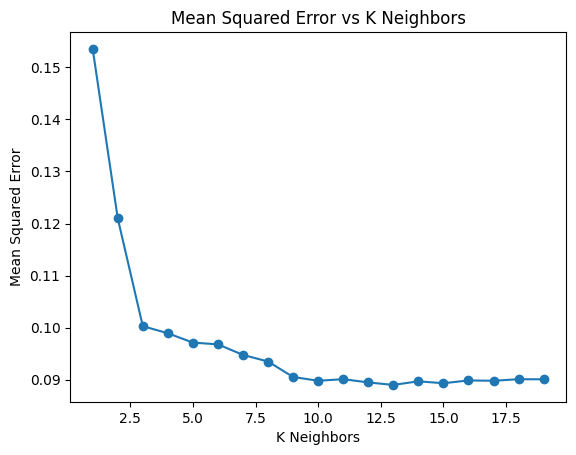

Optimal K value: 13
Mean Squared Error with custom KNN: 0.08899183032444999
Feature Importance:
Demographic_1    0.863308
Demographic_2    0.863308
Demographic_3    0.863308
Hospital_1       0.863308
Hospital_2       0.863308
Factor_1         0.863308
Factor_2         0.863308
Factor_3         0.863308
Factor_4         0.863308
Factor_5         0.863308
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulate dataset
np.random.seed(42)

# Simulated features
num_samples = 1000
population_demographics = np.random.rand(num_samples, 3)  # Simulated demographic data
hospital_characteristics = np.random.rand(num_samples, 2)  # Simulated hospital data
other_factors = np.random.rand(num_samples, 5)  # Simulated other factors

# Simulated target variable (resource allocation score)
resource_allocation_score = np.random.rand(num_samples)

# Create DataFrame
data = pd.DataFrame(np.concatenate([population_demographics, hospital_characteristics, other_factors], axis=1),
                    columns=['Demographic_1', 'Demographic_2', 'Demographic_3',
                             'Hospital_1', 'Hospital_2',
                             'Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5'])

data['Resource_Allocation_Score'] = resource_allocation_score

# Split data into features and target
X = data.drop('Resource_Allocation_Score', axis=1)
y = data['Resource_Allocation_Score']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal value of K
mse_values = []
k_values = range(1, 20)  # Test K values from 1 to 20
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plot MSE vs K values
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs K Neighbors')
plt.show()

# Find optimal K
optimal_k = k_values[np.argmin(mse_values)]
print(f'Optimal K value: {optimal_k}')

# Custom KNN Regressor
class CustomKNNRegressor:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test.values:
            distances = np.linalg.norm(self.X_train.values - x, axis=1)
            nearest_neighbors = np.argsort(distances)[:self.n_neighbors]
            prediction = np.mean(self.y_train.values[nearest_neighbors])
            predictions.append(prediction)
        return predictions

# Instantiate and train custom KNN regressor with optimal K
custom_knn = CustomKNNRegressor(n_neighbors=optimal_k)
custom_knn.fit(X_train, y_train)
y_pred_custom = custom_knn.predict(X_test)

# Evaluate performance
mse_custom = mean_squared_error(y_test, y_pred_custom)
print(f'Mean Squared Error with custom KNN: {mse_custom}')

# Feature Importance
feature_importance = pd.Series(index=X.columns, data=np.mean(np.abs(X_train.values - X_train.values.mean(axis=0)) / X_train.values.std(axis=0)))
feature_importance = feature_importance.sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)
